# From  parspec to theory-specific

## 0. Set up 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner

%matplotlib inline
%config InlineBackend.figure_format='retina'

path = '/Users/hectorokadadasilva/Documents/work/computing/tools/mplstyle/'
plt.style.use(path + 'computermodernstyle.mplstyle')

In [ ]:
# Conversion factors


In [2]:
# Path to data

path_to_data = '../data/parspec/'

In [3]:
# Load data

# The data corresponds to 
# { δω220^{(0)}, δτ220^{(0)}, ℓ }
# runs

# -------------------------------------------
#                 Content
# -------------------------------------------
# | df | dtau | f | tau | ell | mf | af | z |
# -------------------------------------------

p0_df0_dtau0_l = np.loadtxt(path_to_data + 'p0_df0_dtau0_l.dat', unpack=True)
p2_df0_dtau0_l = np.loadtxt(path_to_data + 'p2_df0_dtau0_l.dat', unpack=True)
p4_df0_dtau0_l = np.loadtxt(path_to_data + 'p4_df0_dtau0_l.dat', unpack=True)
p6_df0_dtau0_l = np.loadtxt(path_to_data + 'p6_df0_dtau0_l.dat', unpack=True)

In [17]:
len(p0_df0_dtau0_l[6])

4001

## 1. Quick visualisation

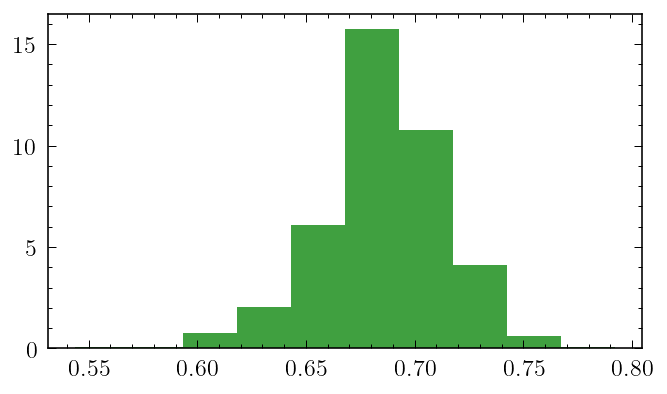

In [13]:
plt.hist(p0_df0_dtau0_l[6], density=True, facecolor='g', alpha=0.75);

## 2. Functions to translate posteriors

In [15]:
def fit_dCS(M, chi, zeta, spin_flag=False):
    """
    Parameters:
    ----------
    M    = mass
    chi  = dimensionless spin parameter a / M = J / M^2
    zeta = dimensionless Chern-Simons expansion parameter
           zeta := \alpha_{CS}^{2} / (M^{4} \kappa)
                 = 16 \pi (\alpha_{CS} / M^{2})^{4}
                 
    Output:
    ------
    wAR  = real part of the axial l = m = 2 mode
    wAI  = imaginary part of the axial l = m = 2 mode
    wPR  = real part of the polar l = m = 2 mode
    wPI  = imaginary part of the polar l = m = 2 mode
    """

    # Include spin corrections?
    
    if spin_flag == False:
        s = 0
    else:
        s = 1
        
    fr = [0.7814, 9.4099, -0.4092, -8.2154, 0.4547, 3.5368]
    fi = [0.5454, -1.4771, -0.6360, 2.0641, 0.3950, -1.2499]
    
    kappa = 1. / (16.*np.pi)

    # ----------------------
    # Axial modes, real part
    # ----------------------
    wAR_exp = fr[4] + fr[5]*kappa*zeta
    wAR     = fr[0] + fr[1]*kappa*zeta \
              + (fr[2] + fr[3]*kappa*zeta)*np.pow(1. - s*chi, wAR_exp)
    
    # ---------------------------
    # Axial modes, imaginary part
    # ---------------------------    
    wAI_exp = fi[4] + fi[5]*kappa*zeta
    wAI     = fi[0] + fi[1]*kappa*zeta \
              + (fi[2] + fi[3]*kappa*zeta)*np.pow(1. - s*chi, wAI_exp)
    
    # ----------------------
    # Polar modes, real part
    # ----------------------
    wPR_exp = 0.483296 - 5.57144*kappa*zeta
    wPR     = 0.907205 - 0.534230*np.pow(1. - s*chi, wPR_exp)
    
    # ---------------------------
    # Polar modes, imaginary part
    # ---------------------------    
    wPI_exp = 0.382411 - 2.17102*kappa*zeta
    wPI     = 0.511681 - 0.601668*np.pow(1. - s*chi, wPI_exp)
    
    return np.array(wAR, wAI, wPR, wPI) / M

In [11]:
def do_translation(data, p, theory):
    # ------------------
    # Separate data file
    # ------------------
    
    # real and imaginary parts of the frequency
    f, tau   = data[2], data[3]
    
    # fractional changes to real and imaginaty parts of the frequency
    df, dtau = data[0], data[1]
    
    # length scale
    ell = data[5]
    
    # remnant's mass, spin and redshift
    mf, af, z = data[6], data[7], data[8]
    
    # ------------------------------------
    # Prepare to call translator functions
    # ------------------------------------

    # For now only p = 4 and p = 6    
    assert (tmp == 4) or (tmp == 6), "Invalid p-value"
    
    if (tmp == 4):
        assert (theory == "dCS") or (theory == "sGB"), "Invalid theory"
    if (tmp == 6):
        assert (theory == "EFTofGR")
        
    # TODO: complete.

In [9]:
tmp = 3
assert (tmp == 2) or (tmp == 4), "Invalid p-value"

AssertionError: Invalid p-value